Author: Hari Adhikari


In this final assignment, i would like to investigate the geographical position (location) of Nepalese Resturant in Helsinki region. Besides that i would also like to see how accessible they are from the nearest train and metro stations. Furthermore, i would like to see, the possible new areas for opening Nepali resturants in Helsinki regions, based on population density. 

So far, i have manually identified the location of each Nepali resturant from Google search, as they were not available in 1) Trip advisor and 2) Open Street Map. This data can be read from data folder "listofnepaliResturants.txt"


Install and import necessary modules 

- Install Geopandas  
conda install -c conda-forge geopandas  
- Install Shapely  
conda install -c conda-forge shapely  
- Install geoplot  
conda install -c conda-forge geoplot  
- Install osmnx  
conda install -c conda-forge osmnx  
- Install pysal  
conda install -c conda-forge pysal  
- Install contextily  
conda install -c conda-forge contextily  
- Install rasterio  
conda install -c conda-forge rasterio  
- Install rasterstats  
conda install -c conda-forge rasterstats  

In [1]:
# Import some modules
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point, LineString, Polygon
import osmnx
import pysal
import cartopy
import geoplot
import osmnx
import folium
import rasterio
import contextily
import matplotlib.pyplot as plt
%matplotlib inline

/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
#origins = pd.read_csv("data/listofnepaliResturants.txt")
data = r"Data/listofnepaliResturants.txt"

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
data = pd.read_csv(data, sep=';')

In [3]:
# Check your input data
print(data.head())

   id                     name                                  addr
0   1      Ravintola Base Camp      Yliopistonkatu 5, 00100 Helsinki
1   2       Ravintola Mountain  Nordenskiöldinkatu 8, 00250 Helsinki
2   3  Ravintola Satkar Kamppi      Fredrikinkatu 46, 00100 Helsinki
3   4       Ravintola Kantipur      Lönnrotinkatu 25, 00180 Helsinki
4   5     Mount Everest Kamppi    Lapinlahdenkatu 15, 00180 Helsinki


In [4]:
# Geocode the adrresses
geo = None

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses with Nominatim backend
geo = geocode(data['addr'], provider = 'nominatim', user_agent = 'autogis_student_2')
geo.head(7)

,address,geometry
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095)
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164)
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745)
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085)
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584)
5,"Pikku Nepal Cross Kitchen, 3, Sörnäistenlaitur...",POINT (24.9837796 60.1851661)
6,"Himalaya, 1a, Ratakatu, Kaartinkaupunki, Etelä...",POINT (24.9456106 60.1637353)


In [7]:
# Join the tables
geodata = None

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geodata = geo.join(data)
geodata.head()

,address,geometry,id,name,addr
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095),1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki"
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164),2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki"
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745),3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki"
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085),4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki"
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584),5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki"


In [8]:
geodata['Latitude'] = geodata['geometry'].y
geodata['Longitude'] = geodata['geometry'].x
geodata.head(5)

,address,geometry,id,name,addr,Latitude,Longitude
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095),1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164),2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745),3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085),4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584),5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035


In [9]:
locations = geodata[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[60.163146, 24.927851]

In [11]:
map = folium.Map(location=[60.20, 24.9], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point]).add_to(map)
    
%matplotlib inline
map

In [20]:
outfp = "Data/NepaleseResturantInHelsinkiRegions.html"
map.save(outfp)

In [12]:
import folium.plugins

#from folium.plugins import MarkerCluster
#MarkerCluster()

map2 = folium.Map(location=[geodata['Latitude'].mean(),geodata['Longitude'].mean()], tiles='Stamen Terrain', zoom_start=11)
marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
map2

In [24]:
outfp = "Data/NepaleseResturantInHelsinkiRegionsCluster.html"
map2.save(outfp)

In [10]:
geodata2= geodata

In [19]:
# mark each station as a point
m = folium.Map(location=[60.20, 24.9], zoom_start=12)

for index, row in geodata2.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=10,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)
    
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point]).add_to(m)
    
m

# Add child to this map and visualize the location of the resturant also
# Also use points in UTM so that buffer of 1km can be used
# Now we are using radians

In [20]:
m = folium.Map(location=[60.20, 24.9], zoom_start=12)

for index, row in geodata2.iterrows():
    folium.Circle([row['Latitude'], row['Longitude']],
                        radius=1000,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)


for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point]).add_to(m)

m.add_child(folium.LatLngPopup())

m



#folium.Circle(
#    radius=100,
#    location=[45.5244, -122.6699],
#    popup='The Waterfront',
#    color='crimson',
#    fill=False,
#).add_to(m)

In [ ]:
geodata['buffer'] = 'None'

In [14]:
print(geodata.crs)
geodata = geodata.to_crs(epsg=3879)
print(geodata.crs)

{'init': 'epsg:4326', 'no_defs': True}
{'init': 'epsg:3879', 'no_defs': True}


In [15]:
geodata['buffer'] = geodata.geometry.buffer(2000)

In [16]:
print(geodata.head())

                                             address  \
0  Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...   
1  Mountain (Nepalese kitchen), 8, Nordenskiöldin...   
2  Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...   
3  Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...   
4  15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...   

                                      geometry  id                     name  \
0  POINT (25497039.10323264 6673004.266015369)   1      Ravintola Base Camp   
1  POINT (25495392.75849388 6674833.946911993)   2       Ravintola Mountain   
2  POINT (25496264.68931959 6672722.535584947)   3  Ravintola Satkar Kamppi   
3  POINT (25496302.48620421 6672425.464407455)   4       Ravintola Kantipur   
4  POINT (25496004.59304756 6672676.449891193)   5     Mount Everest Kamppi   

                                   addr   Latitude  Longitude  \
0      Yliopistonkatu 5, 00100 Helsinki  60.169910  24.946664   
1  Nordenskiöldinkatu 8, 00250 Helsinki  60.186316  24.916

In [17]:
geodata1 = geodata

geodata1['geometry'] = geodata1['buffer']

In [18]:
geodata1.head()

,address,geometry,id,name,addr,Latitude,Longitude,buffer
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...","POLYGON ((25499039.10323264 6673004.266015369,...",1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664,"POLYGON ((25499039.10323264 6673004.266015369,..."
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...","POLYGON ((25497392.75849388 6674833.946911993,...",2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966,"POLYGON ((25497392.75849388 6674833.946911993,..."
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...","POLYGON ((25498264.68931959 6672722.535584947,...",3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719,"POLYGON ((25498264.68931959 6672722.535584947,..."
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...","POLYGON ((25498302.48620421 6672425.464407455,...",4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405,"POLYGON ((25498302.48620421 6672425.464407455,..."
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...","POLYGON ((25498004.59304756 6672676.449891193,...",5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035,"POLYGON ((25498004.59304756 6672676.449891193,..."


In [36]:
type(geodata1)

geopandas.geodataframe.GeoDataFrame

In [40]:
#geodata1[0].to_file(filename='Hari1.geojson', driver='GeoJSON')
#geodata1.to_file(filename='geodata1.shp', driver="ESRI Shapefile")

In [49]:
# mark each station as a point
for index, row in geodata.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=200,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [24]:
import geopandas as gpd
from shapely.geometry import Polygon

lat_point_list = [60.169910, 60.186316, 60.167375, 60.164709]
lon_point_list = [24.946664,  24.916966, 24.932719, 24.933405]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

0    POLYGON ((24.946664 60.16991, 24.916966 60.186...
Name: geometry, dtype: object


In [37]:
type(polygon)

geopandas.geodataframe.GeoDataFrame

In [26]:
import folium
m = folium.Map([60.2, 24.9], zoom_start=5, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m)
#folium.LatLngPopup().add_to(m)
m

In [36]:
map3 = folium.Map(location=[60.2, 24.9], tiles='Stamen Terrain', zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(map3)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata1['name'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
map3

In [44]:
import folium
m = folium.Map([60.2, 24.9], zoom_start=5, tiles='cartodbpositron')

for point in range(0, len(locationlist)):
folium.GeoJson(geodata1).add_to(m)
folium.Marker(locationlist[point], popup=geodata['name'][point]).add_to(map)

#folium.LatLngPopup().add_to(m)
m

AttributeError: module 'folium' has no attribute 'geodata1'

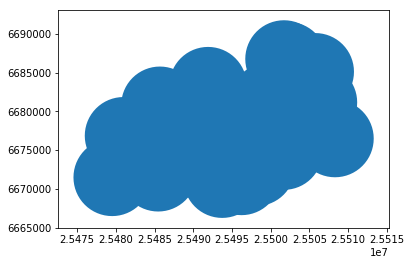

In [38]:
%matplotlib inline
geodata1.plot()

In [ ]:
import pandas as pd
kanton_overview = r'Switzerland_overview.csv'
kanton_data = pd.read_csv(kanton_overview)
kanton_data


kanton_map2 = folium.Map(location=[46.8, 8.33], 
                    zoom_start=7.5)
kanton_map2.choropleth(geo_path='switzerland.geojson', data=kanton_data,
             columns=['CantonNumber', 'Density'],
             key_on='feature.properties.KANTONSNUM',
             threshold_scale=[100, 200, 300, 500, 1000, 5000],
             fill_color='BuPu')
kanton_map2

In [ ]:
HelPop = gpd.read_file("Pop17/Vaestoruudukko_2017.shp")
print(HelPop.head())
type(HelPop)

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# Columns that will be sected
selected_cols = ['ASUKKAITA', 'geometry']

# Select those columns
HelPop = HelPop[selected_cols]

# Let's see the last 2 rows
HelPop.head()

In [ ]:
# Are the layers in the same projection?
print(geodata.crs)
print(HelPop.crs)

# Reproject the population data according to geodata
geodata = geodata.to_crs(HelPop.crs)
# Lets check if the projection are same or not?
geodata.crs == HelPop.crs

In [ ]:
# Make a spatial join
HelPop1 = gpd.sjoin(HelPop, geodata, how="inner", op="within")

# Let's check the result
HelPop1.head()

In [ ]:
HelPop1.groupby(['id'])['ASUKKAITA'].sum()
#print("Population living within 5km from {}")

#print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(mean_area, 2)))

print ("Population living within 5km from %s is %s respectively." % ( ("Itis", "Forum", "Iso-omena", "Sello", "Jumbo", "REDI"), (175632,230376, 109081,174200, 93621, 249187)))